In [1]:
import os, pandas, seaborn, matplotlib

# 0. user-defined variables

In [2]:
input_folder = '/home/adrian/projects/reynisfjara/results/vcf/run04/'

In [3]:
# The location has been retrieved from a http://www.ensembl.org/Mus_musculus/Gene/Summary?db=core;g=ENSMUSG00000035158;r=6:97784013-97998310
# in the genome, it is position 6:97990647
mutation_position = 97990647
shift = 100
location_range = (mutation_position - shift, mutation_position + shift)

# 1. read data

In [4]:
files = os.listdir(input_folder)
vcf_files = [element for element in files if 'vcf' in element]
vcf_files.sort()
print(vcf_files)

['a3922_0h.vcf', 'a3922_48h.vcf', 'a3922_72h.vcf', 'a4774_0h.vcf', 'a4774_48h.vcf', 'a4774_72h.vcf', 'a4775_0h.vcf', 'a4775_48h.vcf', 'a4775_72h.vcf', 'a4776_0h.vcf', 'a4776_48h.vcf', 'a4776_72h.vcf']


# 2. filter

In [5]:
for vcf in vcf_files:
    path = input_folder + vcf
    print(vcf)

    with open(path, 'r') as f:
        for line in f:
            v = line.split('\t')
            if len(v) == 10 and v[0] != '#CHROM':

                locus_name = v[0]
                if locus_name == '6':
                    position = int(v[1])
                    reference = v[3]
                    alternative = v[4]
                    
                    if position > location_range[0] and position < location_range[1]:
                    
                        if len(reference) == 1:

                            info = v[-1]
                            detailed_info = info.split(':')
                            combined_depth = detailed_info[1]
                            observed_reference = int(detailed_info[3])
                            observed_alternative = int(detailed_info[5])
                            quality_reference = int(detailed_info[4])
                            quality_alternative = int(detailed_info[6])                   

                            # GL
                            a = float(detailed_info[-1].split(',')[0])
                            b = float(detailed_info[-1].split(',')[1])
                            c = float(detailed_info[-1].split(',')[2])
                            likelihoods = [a, b, c]

                            mutation_ratio_reads = observed_alternative / (observed_alternative + observed_reference)
                            mutation_ratio_likelihood = quality_alternative / (quality_alternative + quality_reference)

                            print('\t', locus_name, position, reference, alternative, ' => ', 
                                  combined_depth, observed_reference, observed_alternative, '{:.2f}'.format(mutation_ratio_reads), '||', 
                                  quality_reference, quality_alternative, '{:.2f}'.format(mutation_ratio_likelihood))

a3922_0h.vcf
	 6 97990629 G C  =>  171 80 91 0.53 || 2898 3355 0.54
a3922_48h.vcf
	 6 97990629 G C  =>  100 42 58 0.58 || 1504 2108 0.58
a3922_72h.vcf
	 6 97990592 T A  =>  31 29 2 0.06 || 1047 62 0.06
	 6 97990613 G T  =>  30 28 2 0.07 || 1036 74 0.07
	 6 97990629 G C  =>  74 32 42 0.57 || 1134 1492 0.57
a4774_0h.vcf
	 6 97990629 G C  =>  381 212 169 0.44 || 7720 6203 0.45
a4774_48h.vcf
	 6 97990629 G C  =>  443 257 185 0.42 || 9187 6743 0.42
	 6 97990647 A G  =>  6458 2541 3913 0.61 || 91233 142504 0.61
a4774_72h.vcf
	 6 97990629 G C  =>  319 183 135 0.42 || 6573 4855 0.42
	 6 97990647 A G  =>  5434 1679 3753 0.69 || 60173 136625 0.69
a4775_0h.vcf
	 6 97990629 G C  =>  334 178 156 0.47 || 6472 5646 0.47
a4775_48h.vcf
	 6 97990629 G C  =>  335 203 132 0.39 || 7199 4784 0.40
	 6 97990647 A G  =>  5971 2442 3526 0.59 || 87506 128605 0.60
a4775_72h.vcf
	 6 97990629 G C  =>  328 182 146 0.45 || 6504 5328 0.45
	 6 97990647 A G  =>  6686 1957 4726 0.71 || 69865 172191 0.71
a4776_0h.vcf
	 6 

In [6]:
df = pandas.DataFrame()
df['K243R'] = [0, 0, 0, 0, 61, 69, 0, 60, 71, 0, 83, 91]
df['AG > AC'] = [54, 58, 57, 45, 42, 42, 47, 40, 45, 38, 34, 39]
df['labels'] = ['WT 0h', 'WT 48h', 'WT 72h', 'MUT4 0h', 'MUT4 48h', 'MUT4 72h', 'MUT5 0h', 'MUT5 48h', 'MUT5 72h', 'MUT6 0h', 'MUT6 48h', 'MUT6 72h']
df.set_index('labels', inplace=True)
df = df.transpose()

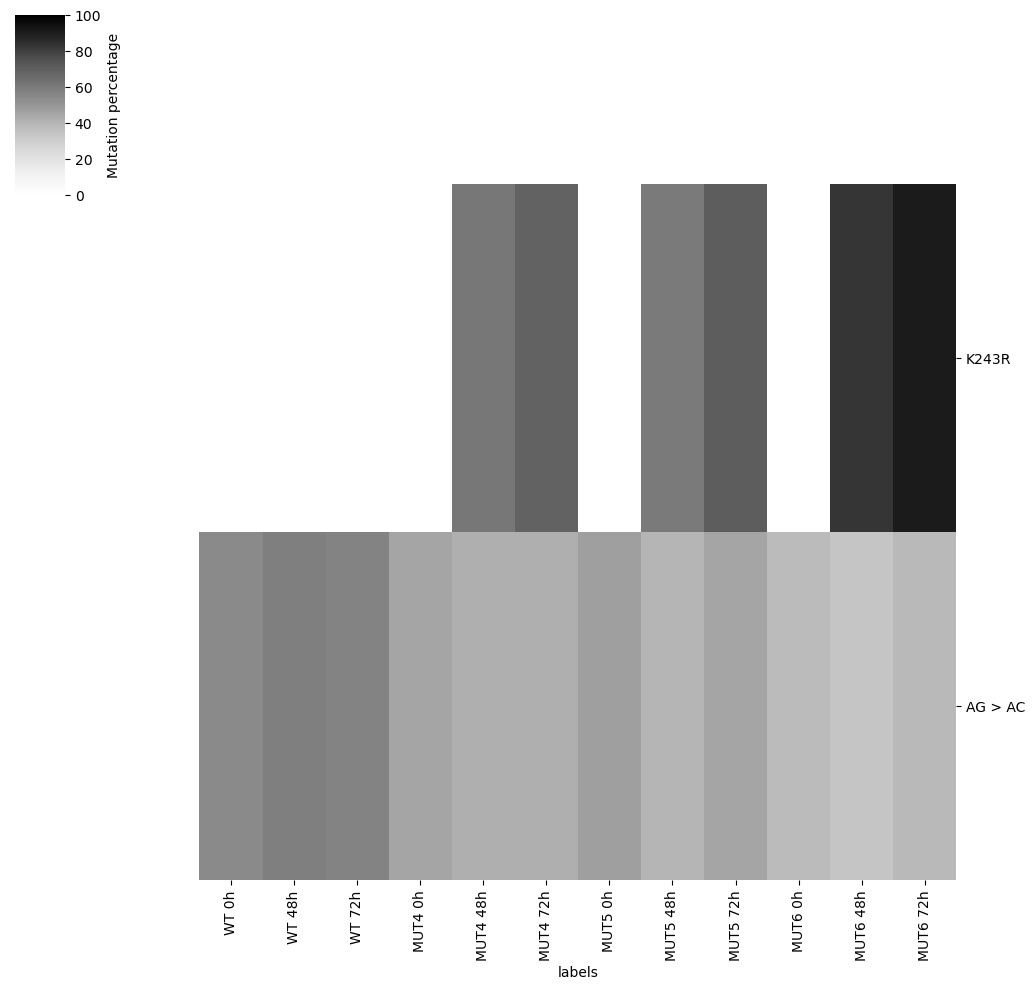

In [8]:
my_fav_colors = ['skyblue','gold','tab:red']
palette = dict(zip(['B1_1', 'B1_2', 'B2_1', 'B2_2'], ['skyblue','tab:blue','tab:red', 'tab:orange']))
my_col_colors = metadata.loc[log10_pools_intensities.columns, 'MS BATCH.1'].map(palette)

g = seaborn.clustermap(df, row_cluster=False, col_cluster=False, cmap = 'Greys', vmin=0, vmax=100, 
                  cbar_kws={'label': 'Mutation percentage'})

g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
matplotlib.pyplot.show()